In [1]:
%load_ext autotime
import sys
sys.path.append("..")
from gastrodon import RemoteEndpoint,QName,ttl,URIRef,model
import pandas as pd
pd.options.display.width=120
pd.options.display.max_colwidth=100

In [2]:
prefixes=model("""
    @prefix : <http://dbpedia.org/resource/> .
    @prefix on: <http://dbpedia.org/ontology/> .
    @prefix pr: <http://dbpedia.org/property/> .
""")

time: 22.1 ms


In [3]:
endpoint=RemoteEndpoint(
    "http://dbpedia.org/sparql/"
    ,default_graph="http://dbpedia.org"
    ,prefixes=prefixes
    ,base_uri="http://dbpedia.org/resource/"
)

time: 2 ms


In [4]:
count=endpoint.select("""
    SELECT (COUNT(*) AS ?count) { ?s ?p ?o .}
""").at[0,"count"]
count

433024494

time: 19.4 s


In [5]:
predicates=endpoint.select("""
    SELECT ?p (COUNT(*) AS ?count) { ?s ?p ?o .} GROUP BY ?p ORDER BY DESC(?count)
""")
predicates

,p,count
0,rdf:type,112493919
1,http://www.w3.org/2002/07/owl#sameAs,33623696
2,http://purl.org/dc/terms/subject,23990506
3,rdfs:label,22430852
4,http://www.w3.org/ns/prov#wasDerivedFrom,15801285
5,on:wikiPageRevisionID,15797811
6,on:wikiPageID,15797811
7,http://purl.org/dc/elements/1.1/language,12845235
8,http://xmlns.com/foaf/0.1/primaryTopic,12845235
9,http://xmlns.com/foaf/0.1/isPrimaryTopicOf,12845234


time: 1min 21s


In [6]:
endpoint.select("""
    SELECT COUNT(*) { SELECT DISTINCT ?p { ?s ?p ?o .} }
""")

,callret-0
0,60648


time: 41.8 s


In [7]:
predicates["dist"]=predicates["count"].cumsum()/count

time: 2 ms


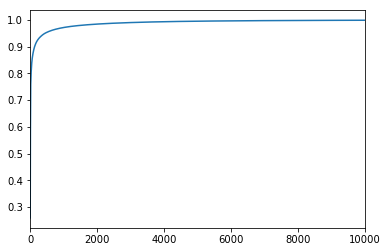

time: 1.17 s


In [8]:
%matplotlib inline
predicates["dist"].plot()

In [9]:
predicates.tail()

,p,count,dist
9995,pr:buschCarTeam,135,0.998423
9996,pr:majorsites,135,0.998423
9997,http://dbpedia.org/property/1v4b,135,0.998423
9998,pr:seats1Last,134,0.998424
9999,pr:allamericans,134,0.998424


time: 10.5 ms


In [10]:
predicates[predicates["dist"]>0.9].head(1)

,p,count,dist
132,pr:t,169841,0.900148


time: 14.5 ms


In [11]:
predicates[predicates["dist"]>0.95].head(1)

,p,count,dist
446,pr:subdivisionName,29914,0.950063


time: 10 ms


In [12]:
predicates[predicates["dist"]>0.98].head(1)

,p,count,dist
1563,pr:mainCharTeam,4719,0.980006


time: 13 ms


In [13]:
predicates[predicates["dist"]>0.99].head(1)

,p,count,dist
3060,pr:generalManager,1723,0.990001


time: 14.5 ms


In [14]:
endpoint.select("""
    SELECT ?s ?o  { ?s <http://dbpedia.org/property/skipperlastname> ?o  }
""")

,s,o
0,1989–90_Whitbread_Round_the_World_Race,English
1,1993–94_Whitbread_Round_the_World_Race,Field
2,1973–74_Whitbread_Round_the_World_Race,Goodwin
3,1977–78_Whitbread_Round_the_World_Race,James
4,1989–90_Whitbread_Round_the_World_Race,Smith
5,1993–94_Whitbread_Round_the_World_Race,Smith
6,1981–82_Whitbread_Round_the_World_Race,Taylor
7,1985–86_Whitbread_Round_the_World_Race,Taylor
8,Oryx_Quest,Thompson
9,1973–74_Whitbread_Round_the_World_Race,Ainslie


time: 695 ms


In [17]:
from bs4 import BeautifulSoup
from IPython.display import display, HTML
from uritools import urijoin

def transclude(file):
    with open(file,"rt",encoding="utf8") as fp:
        soop = BeautifulSoup(fp,"html5lib")
    for a in soop.find_all("a"):
        a["href"]=urijoin("http://en.wikipedia.org/",a["href"])   
    return HTML(str(soop.body))

time: 44.5 ms


In [18]:
 transclude("remote/The_Race.html")

Pos,Boat,Crew,Country,Time
1,Club Med,"Dalton, Grant Grant Dalton",New Zealand,62d 6h 56m 33s
2,Innovation Explorer,"Peyron, Loick Loick Peyron & Skip Novak",France,64d 22h 32m 38s
3,Team Adventure,"Lewis, Cam Cam Lewis",United States,82d 20h 21m 02s
4,Warta Polpharma,"Paszke, Roman Roman Paszke",Poland,99d 12h 31m
5,Team Legato,"Bullimore, Tony Tony Bullimore",Great Britain,104d 20h 52m
-,PlayStation,"Fossett, Steve Steve Fossett",United States,DNF[a]
-,Team Philips,"Goss, Pete Pete Goss",Great Britain,DNS


time: 38.5 ms


In [19]:
pd.options.display.max_rows=99
endpoint.select("""
    BASE <http://dbpedia.org/resource/>
    SELECT ?p ?o  {<The_Race_(yachting_race)> ?p ?o  }
""")

,p,o
0,rdf:type,http://dbpedia.org/class/yago/WikicatSailingRaces
1,rdf:type,http://dbpedia.org/class/yago/WikicatSportsCompetitionsInSpain
2,rdf:type,http://dbpedia.org/class/yago/Abstraction100002137
3,rdf:type,http://dbpedia.org/class/yago/Contest107456188
4,rdf:type,http://dbpedia.org/class/yago/Event100029378
5,rdf:type,http://dbpedia.org/class/yago/PsychologicalFeature100023100
6,rdf:type,http://dbpedia.org/class/yago/Race107472657
7,rdf:type,http://dbpedia.org/class/yago/SocialEvent107288639
8,rdf:type,http://dbpedia.org/class/yago/YagoPermanentlyLocatedEntity
9,rdfs:label,The Race (yachting race)


time: 466 ms


# Types

In [20]:
types=endpoint.select("""
    SELECT ?type (COUNT(*) AS ?count) { ?s a ?type .} GROUP BY ?type ORDER BY DESC(?count)
""")
types

,type,count
0,http://xmlns.com/foaf/0.1/Document,12856178
1,http://www.w3.org/2002/07/owl#Thing,5044222
2,on:Image,2897004
3,http://dbpedia.org/class/yago/PhysicalEntity100001930,2822488
4,http://dbpedia.org/class/yago/Object100002684,2720458
5,http://dbpedia.org/class/yago/YagoLegalActorGeo,2190190
6,http://dbpedia.org/class/yago/Whole100003553,2061271
7,on:Person,1757099
8,http://dbpedia.org/class/yago/YagoPermanentlyLocatedEntity,1654844
9,http://dbpedia.org/class/yago/YagoLegalActor,1548330


time: 29 s


In [21]:
endpoint.select("""
    SELECT (COUNT(*) AS ?count) { SELECT DISTINCT ?type { ?s a ?type .} }
""")

,count
0,483605


time: 11.9 s


In [27]:
types[types["type"].str.startswith('on:')]

,type,count
2,on:Image,2897004
7,on:Person,1757099
10,on:Agent,1529881
23,on:TimePeriod,1127706
27,on:CareerStation,977023
28,on:Place,839987
29,on:Location,839987
35,on:PopulatedPlace,513642
39,on:Work,496070
40,on:Settlement,478906


time: 29 ms


In [37]:
endpoint.select("""
    SELECT ?that { 
        ?that a on:Image
    } LIMIT 10
""")

,that
0,http://en.wikipedia.org/wiki/Special:FilePath/Alfred_Schütz.jpg
1,http://en.wikipedia.org/wiki/Special:FilePath/Aromas.JPG
2,http://en.wikipedia.org/wiki/Special:FilePath/Baldwin_Park_CA_logo.jpg
3,"http://en.wikipedia.org/wiki/Special:FilePath/Bayfield,CO.jpg"
4,http://en.wikipedia.org/wiki/Special:FilePath/Bennettcoskyline.JPG
5,http://en.wikipedia.org/wiki/Special:FilePath/Bitterspring.jpg
6,http://en.wikipedia.org/wiki/Special:FilePath/Boulder_Creek.jpg
7,http://en.wikipedia.org/wiki/Special:FilePath/BrandonFL.gif
8,http://en.wikipedia.org/wiki/Special:FilePath/Buttonwillow.jpg
9,http://en.wikipedia.org/wiki/Special:FilePath/CarberryBookplate.jpg


time: 289 ms


In [38]:
HTML('<img src="{0}">'.format(_.at[0,'that']))

time: 3.5 ms


In [39]:
endpoint.select("""
    SELECT ?that { 
        ?that a on:Person
    } LIMIT 10
""")

,that
0,Andreas_Ekberg
1,Danilo_Tognon
2,Lorine_Livington_Pruette
3,Megan_Lawrence
4,Nikolaos_Ventouras
5,Peter_Ceffons
6,Sani_ol_molk
7,Siniša_Žugić
8,"William_Bagot,_2nd_Baron_Bagot"
9,Witold_Gerutto


time: 2.79 s


In [40]:
endpoint.select("""
    SELECT ?that { 
        ?that a on:Agent
    } LIMIT 10
""")

,that
0,3Com
1,7-Eleven
2,A._C._Bhaktivedanta_Swami_Prabhupada
3,Aardman_Animations
4,Aaron_Burr
5,Abbie_Hoffman
6,About.com
7,Abraham_Robinson
8,Abraham_de_Moivre
9,Academy_of_Motion_Picture_Arts_and_Sciences


time: 7.32 s


In [41]:
endpoint.select("""
    SELECT ?that { 
        ?that a on:Agent
        MINUS {?that a on:Person}
    } LIMIT 10
""")

,that
0,3Com
1,7-Eleven
2,Aardman_Animations
3,About.com
4,Academy_of_Motion_Picture_Arts_and_Sciences
5,Acorn_Computers
6,Activision
7,"Ad_Lib,_Inc."
8,Adnams_Brewery
9,Aermacchi


time: 295 ms


In [42]:
endpoint.select("""
    SELECT ?that { 
        ?that a on:TimePeriod
    } LIMIT 10
""")

,that
0,1
1,10
2,100
3,1000
4,1001
5,1002
6,1003
7,1004
8,1005
9,1006


time: 403 ms


In [50]:
 transclude("remote/1004.html")

time: 40 ms


In [47]:
endpoint.select("""
    SELECT ?that { 
        ?that a on:TimePeriod .
        FILTER(STRSTARTS(STR(?that),"http://dbpedia.org/resource/A"))
    } LIMIT 10
""")

,that
0,A._M._A._Azeez__1
1,A._R._Colquhoun__1
2,Abbie_Wolanow__1
3,Abbie_Wolanow__2
4,Abbie_Wolanow__3
5,Abbie_Wolanow__4
6,Abbie_Wolanow__5
7,Abdul_Wahab_Khan__1
8,Adam_Wolanin__1
9,Adam_Wolanin__2


time: 987 ms


In [52]:
endpoint.select("""
    BASE <http://dbpedia.org/resource/>
    SELECT ?p ?o { 
        <Abbie_Wolanow__1> ?p ?o .
    }
""")

,p,o
0,rdf:type,http://www.w3.org/2002/07/owl#Thing
1,rdf:type,on:CareerStation
2,rdf:type,on:TimePeriod
3,on:team,Hapoel_Tel_Aviv_F.C.


time: 274 ms


In [53]:
endpoint.select("""
    BASE <http://dbpedia.org/resource/>
    SELECT ?p ?o { 
        <Abbie_Wolanow__4> ?p ?o .
    }
""")

,p,o
0,rdf:type,http://www.w3.org/2002/07/owl#Thing
1,rdf:type,on:CareerStation
2,rdf:type,on:TimePeriod
3,on:team,Toronto_City


time: 294 ms


In [54]:
endpoint.select("""
    SELECT ?that { 
        ?that a on:CareerStation
    } LIMIT 10
""")

,that
0,Abbie_Wolanow__1
1,Abbie_Wolanow__2
2,Abbie_Wolanow__3
3,Abbie_Wolanow__4
4,Abbie_Wolanow__5
5,Adam_Wolanin__1
6,Adam_Wolanin__2
7,Adam_Wolanin__3
8,Adam_Wolanin__4
9,Adam_Wolanin__5


time: 300 ms


In [57]:
endpoint.select("""
    BASE <http://dbpedia.org/resource/>
    SELECT ?s ?p  { 
        ?s ?p <Abbie_Wolanow__4> .
    }
""")

,s,p
0,Abbie_Wolanow,on:careerStation


time: 962 ms


In [61]:
endpoint.select("""
    SELECT ?station ?p ?o  { 
        <http://dbpedia.org/resource/Abbie_Wolanow> on:careerStation ?station .
        ?station ?p ?o .
    } ORDER BY ?station
""")

,station,p,o
0,Abbie_Wolanow__1,rdf:type,http://www.w3.org/2002/07/owl#Thing
1,Abbie_Wolanow__1,rdf:type,on:CareerStation
2,Abbie_Wolanow__1,rdf:type,on:TimePeriod
3,Abbie_Wolanow__1,on:team,Hapoel_Tel_Aviv_F.C.
4,Abbie_Wolanow__2,rdf:type,http://www.w3.org/2002/07/owl#Thing
5,Abbie_Wolanow__2,rdf:type,on:CareerStation
6,Abbie_Wolanow__2,rdf:type,on:TimePeriod
7,Abbie_Wolanow__2,on:team,NYU_Violets
8,Abbie_Wolanow__3,rdf:type,http://www.w3.org/2002/07/owl#Thing
9,Abbie_Wolanow__3,rdf:type,on:CareerStation


time: 492 ms


In [56]:
endpoint.select("""
    SELECT ?p (COUNT(*) AS ?count) { 
        ?that a on:CareerStation .
        ?that ?p ?o .
    } GROUP BY ?p ORDER BY DESC(?count)
""")

,p,count
0,rdf:type,2931158
1,on:team,941316
2,on:years,927710
3,on:numberOfGoals,647584
4,on:numberOfMatches,645122
5,on:title,12
6,on:description,2
7,on:filename,2
8,on:country,1
9,on:deathDate,1


time: 3.76 s


In [72]:
pd.options.display.max_rows=20
has_cs_types=endpoint.select("""
    SELECT ?type (COUNT(*) AS ?count) { 
        ?station a on:CareerStation .
        ?who on:careerStation ?station .
        ?who a ?type .
    } GROUP BY ?type ORDER BY DESC(?count)
""")
has_cs_types

,type,count
0,http://xmlns.com/foaf/0.1/Person,977021
1,on:Person,977021
2,http://schema.org/Person,977021
3,http://www.w3.org/2002/07/owl#Thing,977021
4,http://www.wikidata.org/entity/Q5,977021
5,on:Agent,977021
6,http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#Agent,977021
7,http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#NaturalPerson,977021
8,http://www.wikidata.org/entity/Q215627,977021
9,http://www.wikidata.org/entity/Q24229398,977021


time: 8.73 s


In [70]:
has_cs_types[has_cs_types["type"].str.startswith("on:")]

,type,count
1,on:Person,977021
5,on:Agent,977021
24,on:Athlete,779570
25,on:SoccerPlayer,779570
27,on:SoccerManager,197451
28,on:SportsManager,197451


time: 12.5 ms


In [75]:
has_cs_count=endpoint.select("""
    SELECT (COUNT(*) AS ?count) {
        SELECT DISTINCT ?who {
            ?station a on:CareerStation .
            ?who on:careerStation ?station .
        }
    }
""").at[0,'count']
has_cs_count

135887

time: 1.29 s


In [81]:
has_cs_types=endpoint.select("""
    SELECT ?type (COUNT(*) AS ?count) {
        { SELECT DISTINCT ?who {
            ?station a on:CareerStation .
            ?who on:careerStation ?station .
        } }
        ?who a ?type .
    } GROUP BY ?type ORDER BY DESC(?count)
""")
has_cs_types[has_cs_types["type"].str.startswith("on:")]

,type,count
1,on:Person,135887
5,on:Agent,135887
11,on:Athlete,117270
12,on:SoccerPlayer,117270
27,on:SoccerManager,18617
28,on:SportsManager,18617
8771,on:FictionalCharacter,11


time: 16 s


In [82]:
18617+117270

135887

time: 4 ms


In [85]:
endpoint.select("""
    SELECT (COUNT(*) AS ?count) {
        ?x a on:SoccerPlayer .
        ?x a on:SoccerManager .
    }
""")

,count
0,0


time: 292 ms


In [87]:
endpoint.select("""
    SELECT ?x {
        ?x a on:SoccerManager .
    } LIMIT 10
""") 

,x
0,Alan_Shearer
1,Alex_Ferguson
2,Dennis_Bergkamp
3,Enzo_Scifo
4,Marco_van_Basten
5,Osvaldo_Ardiles
6,Ruud_Gullit
7,Walter_Winterbottom
8,Alejandro_Morera_Soto
9,"Aleksandr_Smirnov_(footballer,_born_1968)"


time: 295 ms


In [98]:
endpoint.select("""
    SELECT ?comment  { 
       <http://dbpedia.org/resource/Alex_Ferguson> rdfs:comment ?comment .
       FILTER(LANG(?comment)='en')
    }
""").at[0,"comment"]

'Sir Alexander Chapman "Alex" Ferguson, CBE (born 31 December 1941) is a former Scottish football manager and player who managed Manchester United from 1986 to 2013. He is regarded by many players, managers and analysts to be one of the greatest and most successful managers of all time.'

time: 297 ms
